In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus

In [74]:
dataset = pd.read_csv("C:\\Users\\Akanksha\\Downloads\\winequality-red.csv", sep = ";")
dataset['quality']= dataset['quality'].map(str)
dataset['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: object

<AxesSubplot:>

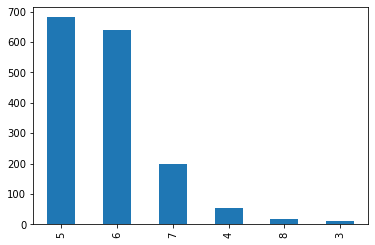

In [75]:
dataset['quality'].value_counts().plot(kind='bar')

In [238]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,T
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,T
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,T
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,M
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,T
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,T
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,M
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,M
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,T


In [77]:
dataset.groupby(['quality']).size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [78]:
dataset['quality'] = dataset['quality'].map({'3': "L", '4': "L",'5': "T", '6': "M",'7': "L", '8': "L"})

In [79]:
dataset['quality'].describe()

count     1599
unique       3
top          T
freq       681
Name: quality, dtype: object

In [80]:
dataset.groupby(['quality']).size()

quality
L    280
M    638
T    681
dtype: int64

<AxesSubplot:>

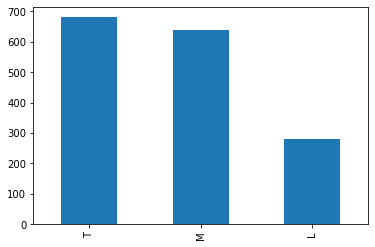

In [83]:
dataset['quality'].value_counts().plot(kind='bar')

In [240]:
#Seperating Label and Attributes
dataset = dataset.drop(['fixed acidity'], axis=1)

In [241]:
dataset

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,T
1,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,T
2,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,T
3,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,M
4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,T
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,T
1595,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,M
1596,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,M
1597,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,T


In [244]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.30, random_state=3)

In [245]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 15)
clf.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [246]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred = clf.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_pred))

DecisionTrees's Accuracy:  0.675


In [248]:
print("Depth of the Decision tree is:",clf.tree_.max_depth)
print("Total number of nodes in the tree are",clf.tree_.node_count)

Depth of the Decision tree is: 15
Total number of nodes in the tree are 513


In [249]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_testset, y_pred))
print(classification_report(y_testset, y_pred))

[[ 45  22  15]
 [ 26 122  48]
 [  8  37 157]]
              precision    recall  f1-score   support

           L       0.57      0.55      0.56        82
           M       0.67      0.62      0.65       196
           T       0.71      0.78      0.74       202

    accuracy                           0.68       480
   macro avg       0.65      0.65      0.65       480
weighted avg       0.67      0.68      0.67       480



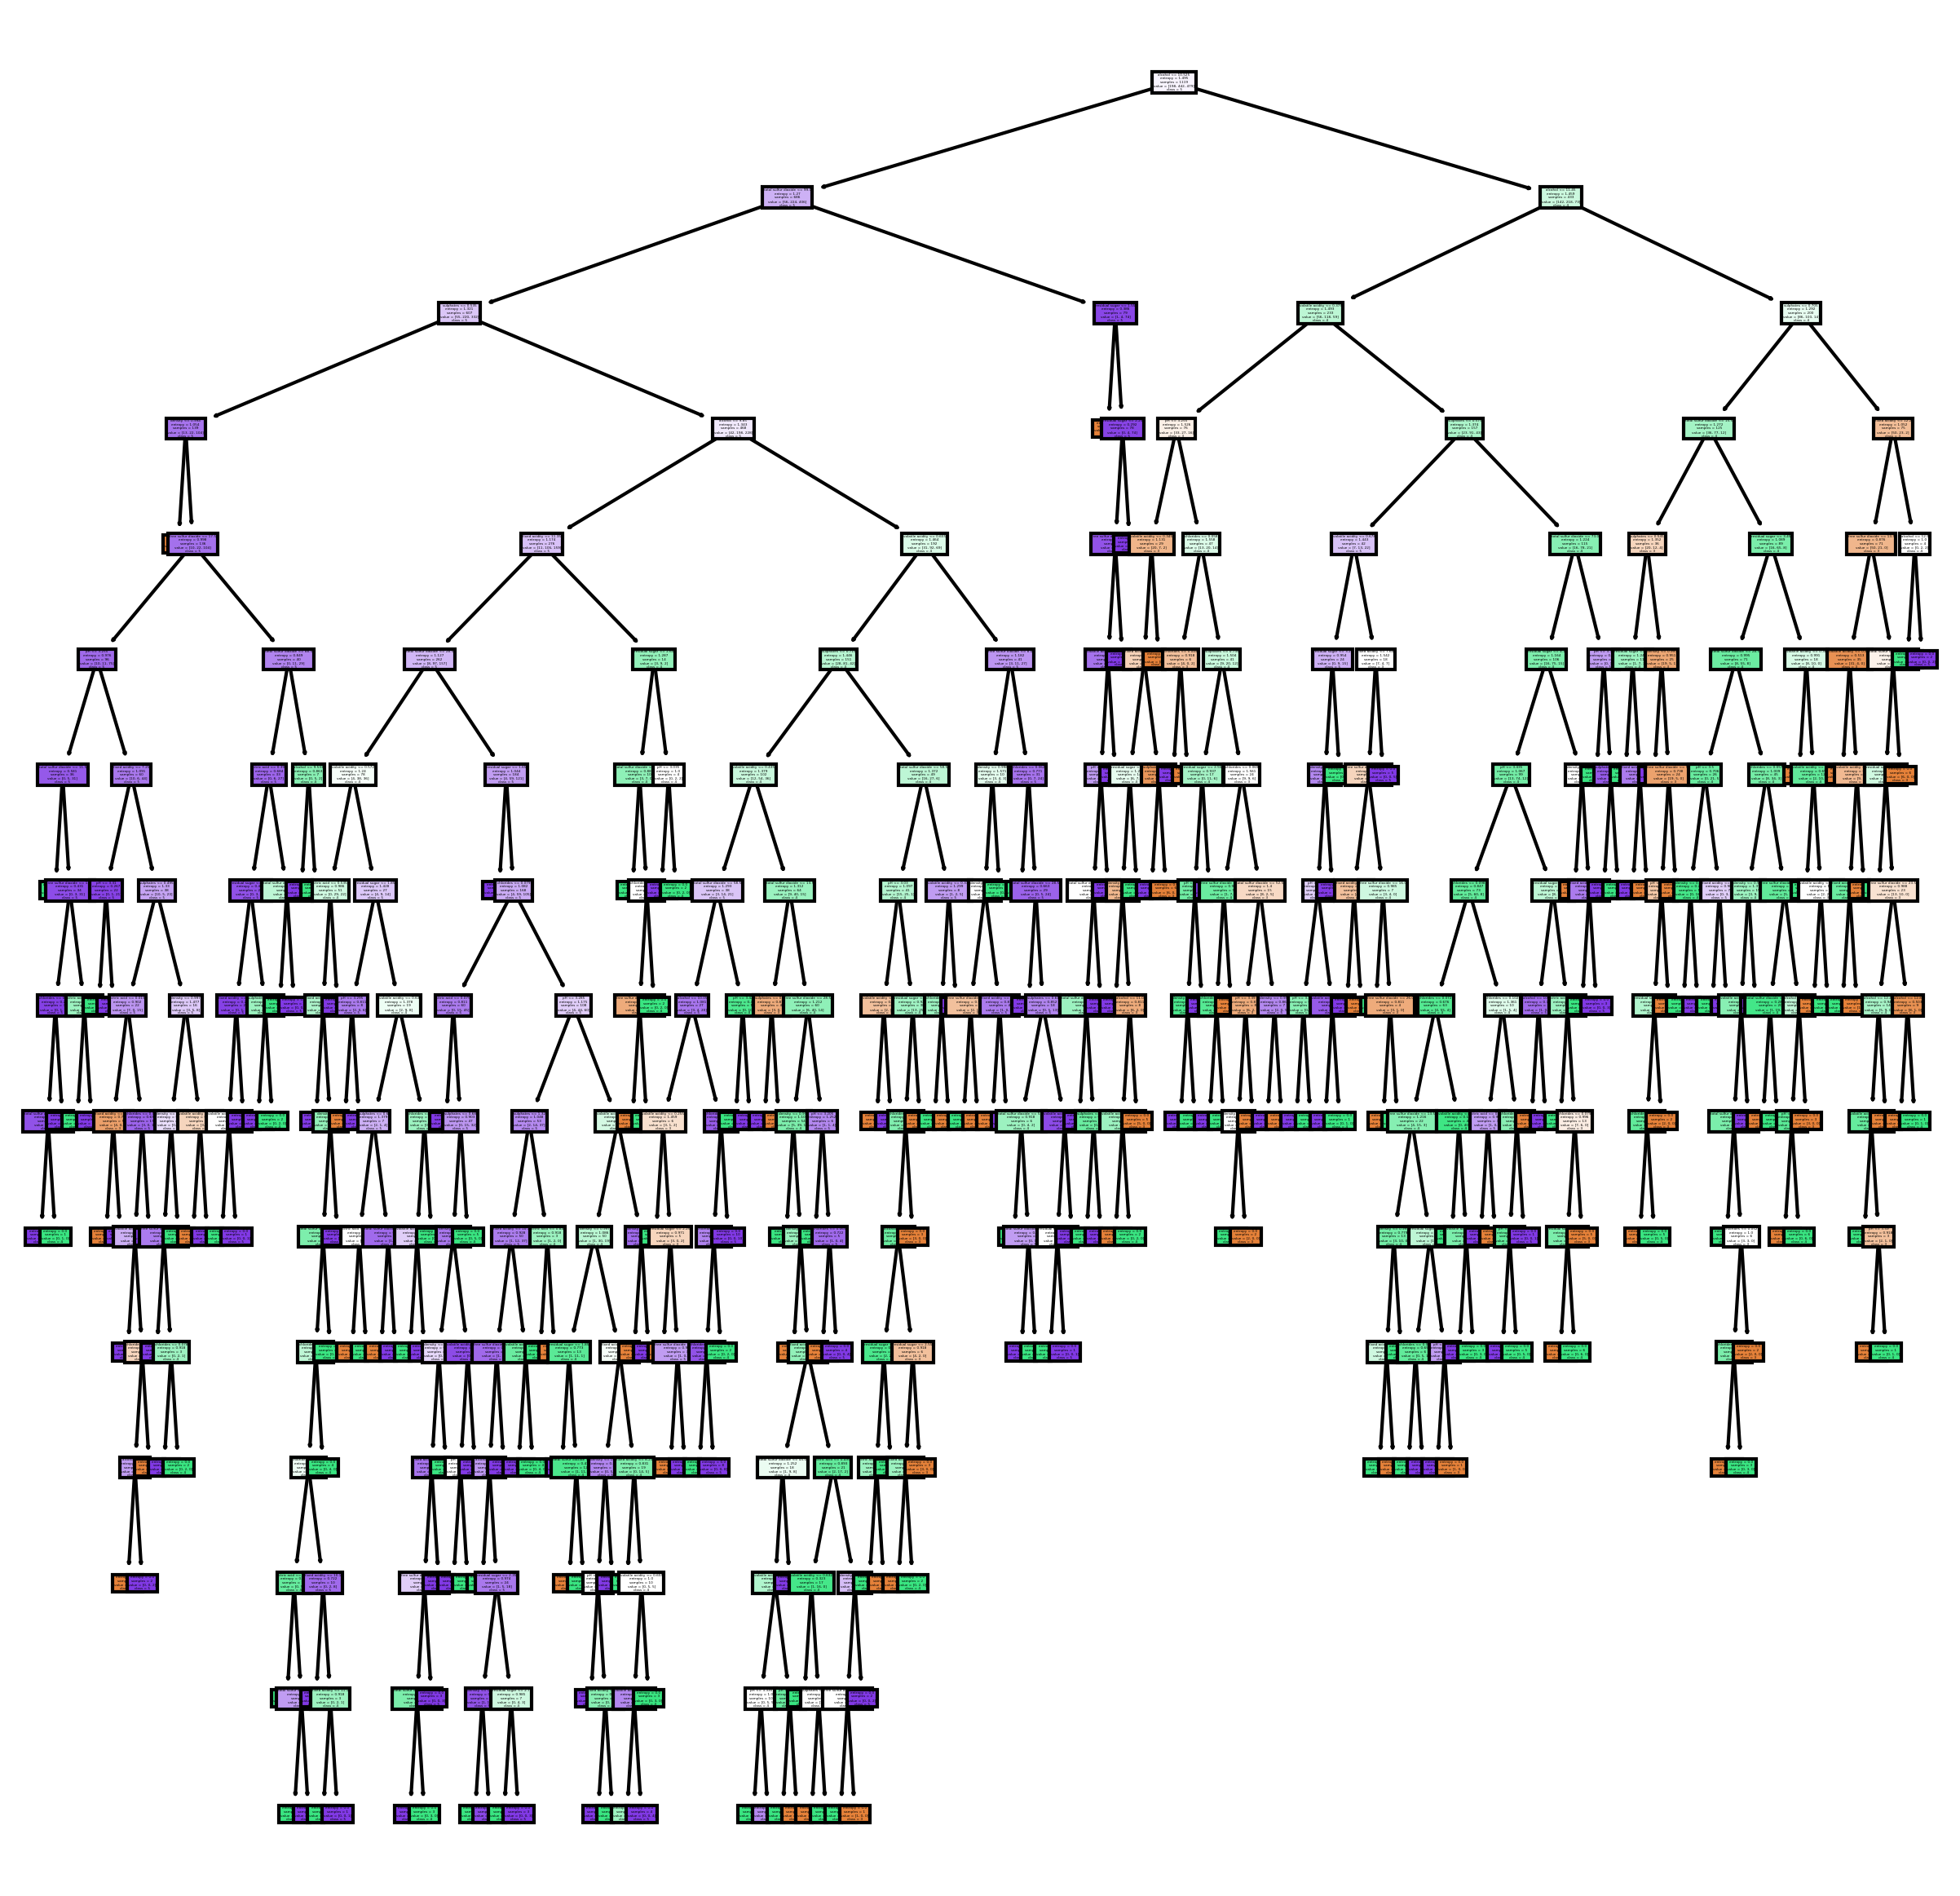

In [247]:
fn=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
cn=['3','4','5','6','7','8']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename-newbins-gini-highestacc-fselection.png')

In [233]:
clf.feature_importances_

array([0.01900315, 0.10479492, 0.05465905, 0.03440136, 0.02684032,
       0.05096721, 0.16793969, 0.05074355, 0.03327093, 0.16137887,
       0.29600096])